In [7]:
import torch #基本モジュール
from torch.autograd import Variable #自動微分用
import torch.nn as nn #ネットワーク構築用
import torch.optim as optim #最適化関数
import torch.nn.functional as F #ネットワーク用の様々な関数
import torch.utils.data #データセット読み込み関連
import torchvision #画像関連
from torchvision import datasets, models, transforms #画像用データセット諸々

import numpy as np
import argparse
import json
from logging.config import dictConfig
from logging import getLogger
import os
import time
import matplotlib.pyplot as plt
export = "../report/2020_06_12"

In [5]:
aa = [19.1, 19.8, 24.0, 36.45, 37.25, 36.95, 37.6, 37.15, 35.15, 36.9, 43.0, 38.6, 41.0, 45.7, 47.6, 47.65, 43.6, 44.35, 46.4, 46.0, 44.9, 40.55, 48.7, 45.95, 49.4, 50.2, 55.1, 50.15, 56.6, 54.25, 53.25, 58.95, 56.4, 49.4, 54.85, 59.05, 58.8, 60.35, 59.5, 57.2, 54.8, 58.1, 61.45, 62.7, 63.1, 60.15, 58.85, 63.15, 61.65, 62.55, 62.7, 63.3, 65.0, 65.5, 66.95, 64.0, 66.05, 61.9, 64.7, 65.85, 56.55, 63.85, 66.5, 66.05, 67.25, 67.8, 66.05, 63.45, 63.9, 65.15, 66.4, 64.35, 64.45, 64.85, 65.35, 66.05, 69.35, 67.0, 66.7, 68.65, 67.05, 65.35, 66.35, 68.35, 65.95, 67.15, 69.7, 64.05, 70.55, 67.15, 69.7, 67.9, 69.95, 68.05, 66.45, 68.4, 68.35, 70.0, 65.15, 67.65]
ab = [20.4, 22.1, 19.15, 20.0, 22.45, 34.05, 35.7, 34.15, 31.75, 29.2, 32.05, 31.45, 27.95, 30.35, 36.95, 47.65, 56.5, 44.8, 46.2, 50.35, 61.4, 64.4, 65.25, 68.6, 64.85, 71.7, 70.45, 67.85, 65.2, 66.6, 72.95, 70.0, 73.85, 65.3, 77.65, 73.65, 73.6, 72.3, 76.3, 73.05, 68.0, 74.9, 79.3, 77.2, 71.05, 73.2, 78.75, 77.7, 79.4, 78.9, 75.65, 76.8, 73.35, 78.9, 71.95, 76.6, 77.05, 80.5, 79.15, 71.6, 72.1, 81.3, 76.8, 79.0, 74.6, 80.85, 75.95, 71.4, 81.8, 79.25, 79.35, 78.9, 80.25, 79.2, 80.4, 79.7, 79.15, 74.85, 80.15, 78.5, 80.4, 79.4, 78.7, 80.7, 80.1, 79.05, 76.85, 80.25, 77.85, 79.4, 80.65, 79.55, 80.05, 79.15, 79.05, 79.0, 79.1, 75.45, 80.0, 80.8]
ax = [50.7] * 100

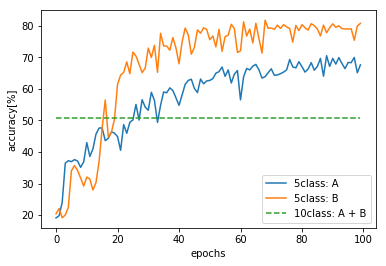

In [8]:
times = len(aa)
fig = plt.figure()
plt.plot(np.arange(times), aa, label="5class: A")
plt.plot(np.arange(times), ab, label="5class: B")
plt.plot(np.arange(times), ax, label="10class: A + B", linestyle="--")
# plt.plot(np.arange(times), n_y_acc, label="exp2:step4", linestyle="--")
# plt.plot(np.arange(times), b_x_acc, label="exp3", linewidth = 2)
plt.xlabel("epochs")
plt.ylabel("accuracy[%]")
plt.legend()
plt.show()
fig.savefig(os.path.join(export, "accuracy.png"))